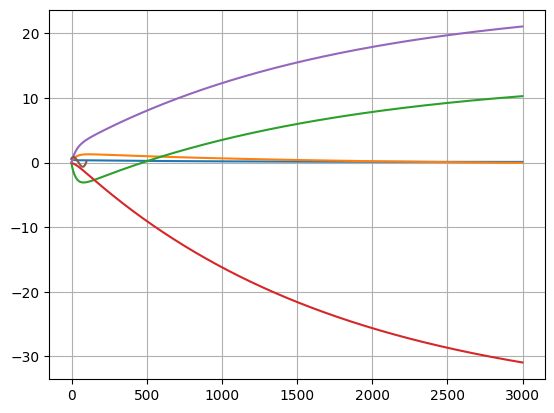

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
L=100
tk = np.arange(0,1,0.01)
no_of_inputs = 3
W = np.zeros(no_of_inputs+1)
eta = 0.09
iterations = 3000

noise = np.random.normal(0,np.sqrt(0.09),tk.size)
function = np.sin(2*np.pi*tk)+noise

MSE = np.zeros(iterations)
x = np.zeros((L, no_of_inputs+1))
for i in range(L):
    for j in range(no_of_inputs+1):
        x[i,j] = tk[i]**j

W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    for j in range(L-1):
        e = (function[j]-W[0].T @ x[j])
        W[0] = W[0] + eta *e*x[j]
        W[i+1] = W[0]
    MSE[i] = np.mean((function-x @ W[0].T)**2)

plt.plot(MSE)
plt.plot(W[1:])
plt.plot(W[1000] @ x.T)
plt.grid()
print()


In [16]:
#stochastic gradient descent
eta = 0.09
iterations = 1000
W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    error = function[j]-W[i].T @ x[j]
    W[i+1] = W[i] - eta*error



In [17]:
N = 50
eta = 0.09

x = np.column_stack([np.ones(50),np.linspace(-1,1,N)])

y1 = x[:,1]**2
y2 = np.sin(x[:,1])
y3 = np.abs(x[:,1])
y4 = np.heaviside(x[:,1],0)


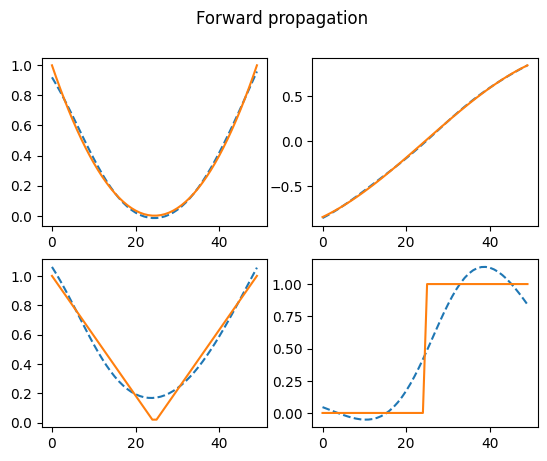

In [23]:
sigma=1
V = np.random.normal(0,sigma,(3,2))


phi = np.tanh(x@V.T)
phi = np.array([np.ones(50),phi[:,0],phi[:,1],phi[:,2]]).T
W1 = np.linalg.pinv(phi)@y1
W2 = np.linalg.pinv(phi)@y2
W3 = np.linalg.pinv(phi)@y3
W4 = np.linalg.pinv(phi)@y4

ytk_1= W1@phi.T
ytk_2= W2@phi.T
ytk_3= W3@phi.T
ytk_4= W4@phi.T


#plot 1:
plt.subplot(2, 2, 1)
plt.plot(ytk_1,linestyle="dashed")
plt.plot(y1)

#plot 2:
plt.subplot(2, 2, 2)
plt.plot(ytk_2,linestyle="dashed")
plt.plot(y2)

#plot 3:
plt.subplot(2, 2, 3)
plt.plot(ytk_3,linestyle="dashed")
plt.plot(y3)

#plot 4:
plt.subplot(2, 2, 4)
plt.plot(ytk_4,linestyle="dashed")
plt.plot(y4)
plt.suptitle('Forward propagation')
plt.show()

Neural Network

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def NN(x,y,eta,W_ji,W_kj):
    for _ in range(1000):
        for i in range(len(x)):
            x_i = x[i].reshape((1,2))

            aj = (W_ji @ x_i[0])
            zj = np.hstack((1,np.tanh(aj)))

            yk = W_kj@zj
            dk = yk - y[i]
            dj = ((1-zj**2)*W_kj*dk.T)[:,1:]   

            W_ji = W_ji - eta*dj.T@x_i
            W_kj = W_kj - eta*dk*zj

    return W_ji,W_kj
sigma = 1

V= np.random.normal(0,sigma,(3,2))
W = np.random.normal(0,sigma,(1,4))
x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])

y1 = x[:,1]**2
y2 = np.sin(x[:,1])
y3 = np.abs(x[:,1])
y4 = np.heaviside(x[:,1],0)

def to_plot(y):
    V= np.random.normal(0,sigma,(3,2))
    W = np.random.normal(0,sigma,(1,4))
    V,W = NN(x,y,0.2,V,W)
    aj = (V @x.T)
    zj = np.column_stack((np.ones((50)),np.tanh(aj).T))
    return  W@zj.T



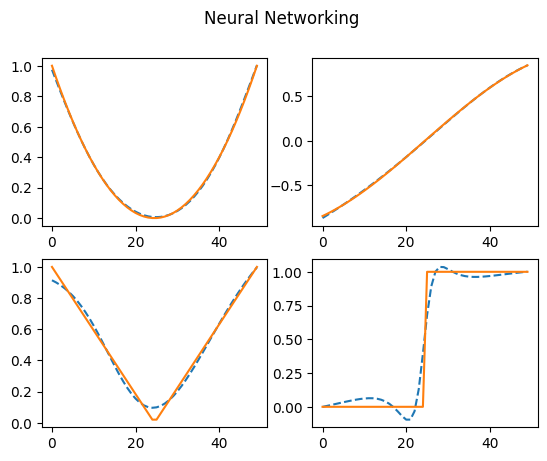

In [29]:
ytk_1 = to_plot(y1)
ytk_2 = to_plot(y2)
ytk_3 = to_plot(y3)
ytk_4 = to_plot(y4)

#plot 1:
plt.subplot(2, 2, 1)
plt.plot(ytk_1[0],linestyle="dashed")
plt.plot(y1)

#plot 2:
plt.subplot(2, 2, 2)
plt.plot(ytk_2[0],linestyle="dashed")
plt.plot(y2)

#plot 3:
plt.subplot(2, 2, 3)
plt.plot(ytk_3[0],linestyle="dashed")
plt.plot(y3)

#plot 4:
plt.subplot(2, 2, 4)
plt.plot(ytk_4[0],linestyle="dashed")
plt.plot(y4)
plt.suptitle('Neural Networking')
plt.show()